In [58]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 12)) 

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

In [33]:
df = pd.read_csv(r"C:\Users\KANISHKA\Downloads\EDA1\EDA1\Cardiotocographic.csv")

In [34]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [35]:
df.isna().sum() #finding the number of missing values

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [36]:
for i in df.isna().sum():
    print((i/len(df))*100) # calculating percentage of missing values

0.9877704609595485
0.940733772342427
0.0
0.0
0.0
0.9877704609595485
0.9877704609595485
0.0
0.0
0.0
0.9877704609595485
0.9877704609595485
0.9877704609595485
0.9877704609595485


In [37]:
# the percentage of missing values is less than 5% so we can drop those rows where there are missing values

In [38]:
df = df.dropna() ## code to drop rows with missing values

In [39]:
df.isna().sum() ## code to check if there is still any missing value left

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

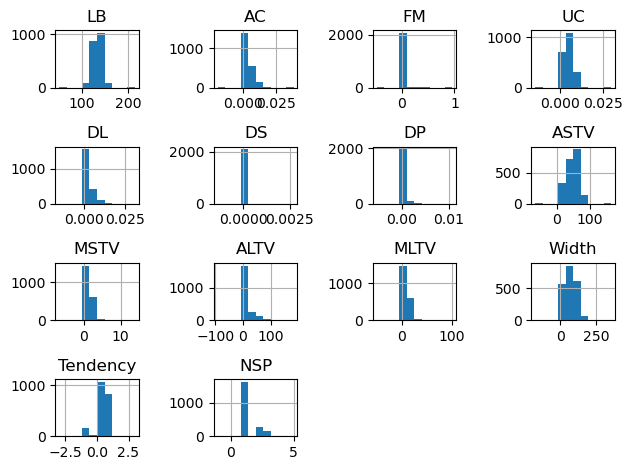

In [40]:
df.hist()
plt.tight_layout()

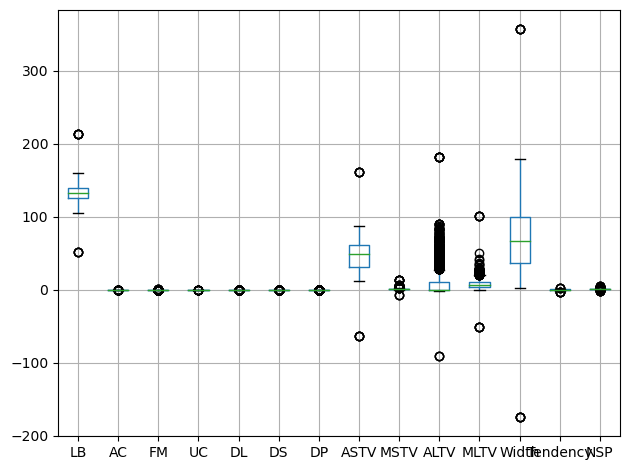

In [41]:
df.boxplot()
plt.tight_layout()

In [42]:
## outlier detection using defined function

def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return upper,lower

In [43]:
outlier_detection(df,df.columns)

(LB          161.000000
 AC            0.014124
 FM            0.006386
 UC            0.013583
 DL            0.008224
 DS            0.000000
 DP            0.000000
 ASTV        104.500000
 MSTV          3.200000
 ALTV         27.500000
 MLTV         20.350000
 Width       194.500000
 Tendency      2.500000
 NSP           1.000000
 dtype: float64,
 LB          105.000000
 AC           -0.008475
 FM           -0.003831
 UC           -0.005209
 DL           -0.004934
 DS            0.000000
 DP            0.000000
 ASTV        -11.500000
 MSTV         -0.800000
 ALTV        -16.500000
 MLTV         -4.850000
 Width       -57.500000
 Tendency     -1.500000
 NSP           1.000000
 dtype: float64)

In [ ]:
##capping of outliers

In [44]:
df.loc[df['LB']>161, 'LB'] = 161

C:\Users\KANISHKA\AppData\Local\Temp\ipykernel_10564\3798935630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['LB']>161, 'LB'] = 161


In [45]:
df.loc[df['ALTV']>27, 'ALTV'] = 27

C:\Users\KANISHKA\AppData\Local\Temp\ipykernel_10564\1901650494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['ALTV']>27, 'ALTV'] = 27


In [46]:
df.loc[df['MSTV']>3.20, 'MSTV'] = 3.20

C:\Users\KANISHKA\AppData\Local\Temp\ipykernel_10564\137710229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['MSTV']>3.20, 'MSTV'] = 3.20


In [47]:
df.loc[df['ASTV']>104.5, 'ASTV'] = 104.5

C:\Users\KANISHKA\AppData\Local\Temp\ipykernel_10564\2806299953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['ASTV']>104.5, 'ASTV'] = 104.5


In [48]:
df.loc[df['Tendency']>2.50, 'Tendency'] = 2.50

C:\Users\KANISHKA\AppData\Local\Temp\ipykernel_10564\1302401204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Tendency']>2.50, 'Tendency'] = 2.50


In [49]:
df.loc[df['Width']>194.50, 'Width'] = 194.50

C:\Users\KANISHKA\AppData\Local\Temp\ipykernel_10564\518517030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Width']>194.50, 'Width'] = 194.50


In [50]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,27.0,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,1.000000,2.000000


In [51]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.192529,0.003202,0.009963,0.004388,0.001892,0.000003,0.000175,46.860349,1.293740,6.546307,8.284887,70.043275,0.315421,1.304507
std,10.517750,0.004324,0.067870,0.003350,0.003348,0.000142,0.000840,18.211164,0.831006,10.856407,7.772858,41.041627,0.642028,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,161.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,104.500000,3.200000,27.000000,101.400000,194.500000,2.500000,5.000000


In [52]:
# since DS, DL and DP has varince = 0, so will drop these columns because they dont contain much information

In [53]:
df = df.drop(['DL','DS','DP'], axis=1)

In [54]:
df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,73.0,0.5,27.0,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,17.0,2.1,0.0,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,16.0,2.1,0.0,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,16.0,2.4,0.0,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,16.0,2.4,0.0,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,79.0,0.2,25.0,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,78.0,0.4,22.0,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,79.0,0.4,20.0,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,78.0,0.4,27.0,7.0,66.0,1.000000,2.000000


In [67]:
df.describe()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.192529,0.003202,0.009963,0.004388,46.860349,1.293740,6.546307,8.284887,70.043275,0.315421,1.304507
std,10.517750,0.004324,0.067870,0.003350,18.211164,0.831006,10.856407,7.772858,41.041627,0.642028,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001838,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001631,0.000000,0.004484,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002554,0.006536,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,161.000000,0.038567,0.961268,0.030002,104.500000,3.200000,27.000000,101.400000,194.500000,2.500000,5.000000


C:\Users\KANISHKA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


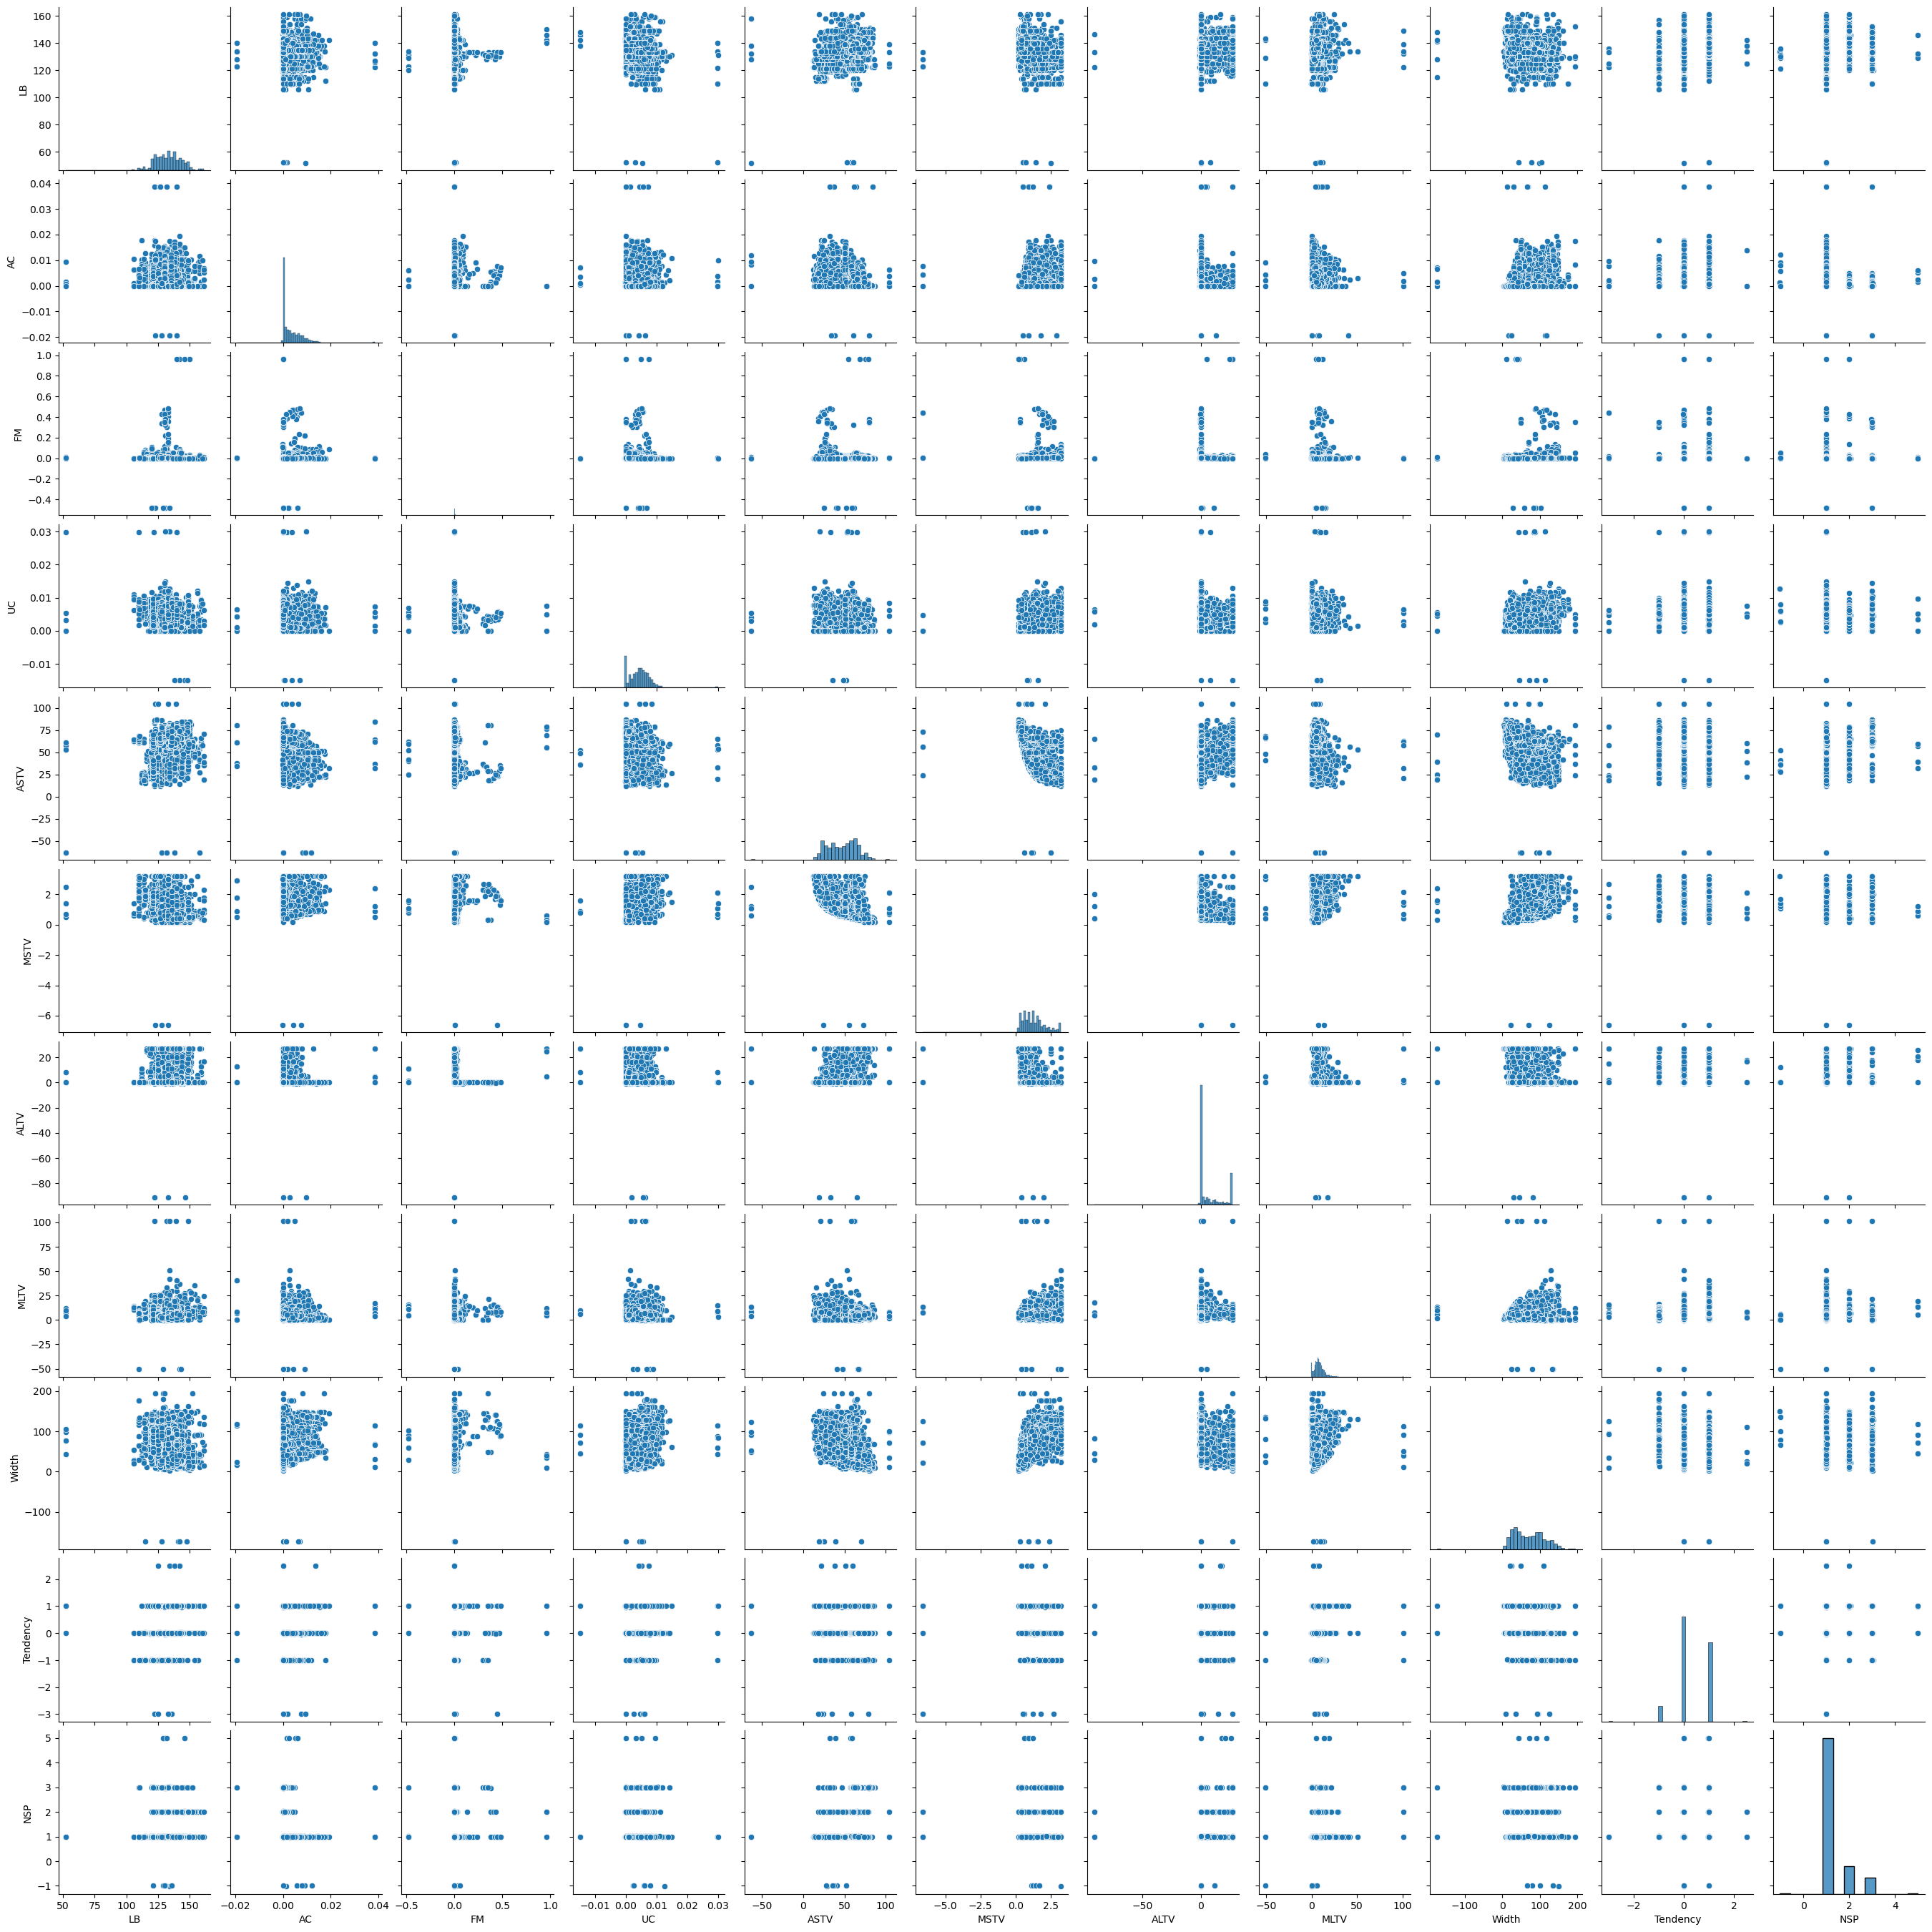

In [59]:
sns.pairplot(df)

In [56]:
df.corr()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.072089,0.021686,-0.172171,0.274474,-0.259640,0.293407,-0.009741,-0.132276,0.254630,0.144380
AC,-0.072089,1.000000,0.010152,0.070135,-0.236857,0.178374,-0.348010,-0.106529,0.245241,0.032586,-0.316941
FM,0.021686,0.010152,1.000000,-0.052979,-0.033200,0.022691,-0.017079,-0.006237,0.091796,-0.018224,0.074054
UC,-0.172171,0.070135,-0.052979,1.000000,-0.186200,0.259954,-0.261619,-0.049460,0.117448,-0.067484,-0.185411
ASTV,0.274474,-0.236857,-0.033200,-0.186200,1.000000,-0.397588,0.406182,-0.225159,-0.224562,-0.007340,0.438681
MSTV,-0.259640,0.178374,0.022691,0.259954,-0.397588,1.000000,-0.481118,0.030348,0.590377,-0.040348,-0.122168
ALTV,0.293407,-0.348010,-0.017079,-0.261619,0.406182,-0.481118,1.000000,-0.090006,-0.397972,0.046542,0.330472
MLTV,-0.009741,-0.106529,-0.006237,-0.049460,-0.225159,0.030348,-0.090006,1.000000,0.064359,0.117471,-0.113674
Width,-0.132276,0.245241,0.091796,0.117448,-0.224562,0.590377,-0.397972,0.064359,1.000000,0.090884,-0.071916
Tendency,0.254630,0.032586,-0.018224,-0.067484,-0.007340,-0.040348,0.046542,0.117471,0.090884,1.000000,-0.106707


<Figure size 5000x4800 with 0 Axes>

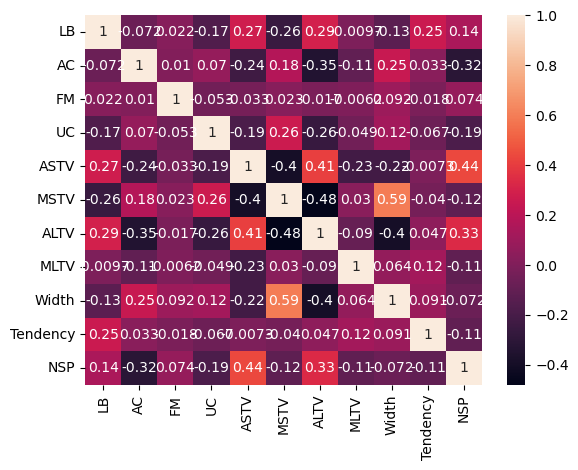

<Figure size 5000x4800 with 0 Axes>

In [66]:
sns.heatmap(df.corr(), annot=True)
plt.figure(figsize=(50,48))

In [ ]:
## none of the variables have shown high correlation among them, most of the variables have correlation ranging between -0.2 to
## 0.3 which shown very low correlation among the variables

In [ ]:
## further analysis of this data has shown that model that will be build using this data can be effective since there very less
## or no chances of multicollinearity which is one the assumption of regression in econometrics.